In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', 2000)

## Columns in this Dataset

DR_NO	
Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits
Plain Text
Data Type
Text
API Field Name
dr_no

Date Rptd	
MM/DD/YYYY
Date & Time
Data Type
Floating Timestamp
API Field Name
date_rptd

DATE OCC	
MM/DD/YYYY
Date & Time
Data Type
Floating Timestamp
API Field Name
date_occ

TIME OCC	
In 24 hour military time.
Plain Text

AREA	
The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
Plain Text
Data Type
Text
API Field Name
area
AREA NAME	
The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.
Plain Text
Data Type
Text

API Field Name
area_name
Rpt Dist No	
A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4
Plain Text
Data Type
Text

API Field Name
rpt_dist_no
Part 1-2	
Number
Data Type
Number

API Field Name
part_1_2
Crm Cd	
Indicates the crime committed. (Same as Crime Code 1)
Plain Text
Data Type
Text

API Field Name
crm_cd
Crm Cd Desc	
Defines the Crime Code provided.
Plain Text
Data Type
Text
API Field Name
crm_cd_desc

Mocodes	
Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf
Plain Text
Data Type
Text
API Field Name
mocodes

Vict Age	
Two character numeric
Plain Text
Data Type
Text
API Field Name
vict_age

Vict Sex	
F - Female M - Male X - Unknown
Plain Text
Vict Descent	
Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
Plain Text
Data Type
Text
API Field Name
vict_descent

Premis Cd	
The type of structure, vehicle, or location where the crime took place.
Number
Data Type
Number
API Field Name
premis_cd

Premis Desc	
Defines the Premise Code provided.
Plain Text
Data Type
Text
API Field Name
premis_desc

Weapon Used Cd	
The type of weapon used in the crime.
Plain Text
Data Type
Text
API Field Name
weapon_used_cd

Weapon Desc	
Defines the Weapon Used Code provided.
Plain Text
Data Type
Text
API Field Name
weapon_desc

Status	
Status of the case. (IC is the default)
Plain Text
Data Type
Text
API Field Name
status
Status Desc	
Defines the Status Code provided.
Plain Text

Crm Cd 1	
Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
Plain Text
Data Type
Text
API Field Name
crm_cd_1

Crm Cd 2	
May contain a code for an additional crime, less serious than Crime Code 1.
Plain Text
Data Type
Text
API Field Name
crm_cd_2

Crm Cd 3	
May contain a code for an additional crime, less serious than Crime Code 1.
Plain Text
Data Type
Text
API Field Name
crm_cd_3

Crm Cd 4	
May contain a code for an additional crime, less serious than Crime Code 1.
Plain Text
Data Type
Text
API Field Name
crm_cd_4

LOCATION	
Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
Plain Text
Data Type
Text
API Field Name
location

Cross Street	
Cross Street of rounded Address
Plain Text
Data Type
Text
API Field Name
cross_street

LAT	
Latitude
Number

LON	
Longtitude
Number


In [5]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
3,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
4,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541348,220314584,08/02/2022 12:00:00 AM,08/02/2022 12:00:00 AM,10,3,Southwest,334,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,4300 W 28TH ST,NaN,34.0311,-118.3335
541349,221005507,02/10/2022 12:00:00 AM,02/09/2022 12:00:00 AM,1530,10,West Valley,1024,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,18800 SHERMAN WY,NaN,34.2011,-118.5426
541350,221105477,02/10/2022 12:00:00 AM,02/08/2022 12:00:00 AM,2000,11,Northeast,1171,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 FOUNTAIN AV,NaN,34.0958,-118.2787
541351,221605448,02/15/2022 12:00:00 AM,02/14/2022 12:00:00 AM,1800,16,Foothill,1613,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),...,IC,Invest Cont,331.0,NaN,NaN,NaN,12700 VAN NUYS BL,NaN,34.2755,-118.4092


In [11]:
df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            75111
Vict Age               0
Vict Sex           71881
Vict Descent       71886
Premis Cd              5
Premis Desc          246
Weapon Used Cd    348835
Weapon Desc       348835
Status                 0
Status Desc            0
Crm Cd 1               6
Crm Cd 2          499529
Crm Cd 3          539924
Crm Cd 4          541312
LOCATION               0
Cross Street      449474
LAT                    0
LON                    0
dtype: int64

### Most of the meaningful attributes are clean

Mocodes attribute is not always present in a crime so it is understandable that there is a lot of null values for that attribute. Same for Crm Cd1. There can be multiple charges for one crime, but from this dataset, it shows that majority of the crimes result in just one charge.

The Vict Sex attribute has a lot of missing values.

In [12]:
df['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'THEFT PLAIN - PETTY ($950 & UNDER)', 'ROBBERY',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'VEHICLE - STOLEN', 'BURGLARY',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)', 'TRESPASSING', 'BRANDISH WEAPON',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'THEFT FROM MOTOR VEHICLE - ATTEMPT',
       'THROWING OBJECT AT MOVING VEHICLE', 'THEFT OF IDENTITY',
       'BUNCO, GRAND THEFT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'ATTEMPTED R

In [13]:
df['Status Desc'].unique()

array(['Adult Other', 'Invest Cont', 'Adult Arrest', 'Juv Arrest',
       'Juv Other'], dtype=object)

### Fixing time occ 

Time is in an awkward format. It has 3 digits for some, and 4 digits for other rows. 

In [14]:
(df['TIME OCC'].unique())

array([2230,  330, 1730, ...,  559,  818,  841], dtype=int64)

In [15]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [16]:
df['timeCorrected'] = df['TIME OCC'].astype('str')

In [17]:
df['timeLength'] = df['timeCorrected'].apply(lambda x: len(x))
df['timeLength']

0         4
1         3
2         4
3         3
4         2
         ..
541348    2
541349    4
541350    4
541351    4
541352    3
Name: timeLength, Length: 541353, dtype: int64

In [18]:
df = df[df['timeLength'] > 2]

In [19]:
df['timeLength'].value_counts()

4    392966
3    126136
Name: timeLength, dtype: int64

In [66]:
for i in df['timeCorrected'].head(25).unique():
    print(i)

22:30
03:30
17:30
04:15
13:15
02:00
22:00
09:55
13:55
16:38
18:05
19:00
13:30
14:45
07:00
20:00
12:00
04:00
06:00
15:00
21:00
19:30
23:00


In [21]:
def addingZero(x):
    if len(x) == 3:
        x = '0' + x
        return x
    else:
        return x

In [22]:
df['timeLength'] = df['timeCorrected'].apply(lambda x: len(x))
df['timeLength'].value_counts()

4    392966
3    126136
Name: timeLength, dtype: int64

In [23]:
df['timeCorrected'] = df['timeCorrected'].apply(addingZero)
df['timeCorrected']

0         2230
1         0330
2         1730
3         0415
5         1315
          ... 
541347    1730
541349    1530
541350    2000
541351    1800
541352    0150
Name: timeCorrected, Length: 519102, dtype: object

In [24]:
df['timeCorrected'] = df['timeCorrected'].apply(lambda x: f'{x[:2]}:{x[2:]}')
df['timeCorrected'].value_counts()

12:00    19677
18:00    14857
17:00    14028
20:00    13833
19:00    12866
         ...  
05:34        9
07:41        9
01:51        9
05:31        8
06:42        7
Name: timeCorrected, Length: 1380, dtype: int64

In [25]:
df['hourOfCrime'] = df['timeCorrected'].apply(lambda x: x[:2])
len(df['hourOfCrime'].unique())

23

#### Adding mocodes

In [30]:
mocodes = pd.read_csv("mocodes1.txt")
mocodes

,Mocodes,desc
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer
...,...,...
747,2311,Acquisition of expertise
748,2312,Weapons discovery
749,2313,Finance
750,2314,TSC hit


In [31]:
mocodes.loc[mocodes['Mocodes'] == '0100']

,Mocodes,desc
0,0100,Suspect Impersonate


In [32]:
mocodes = mocodes.set_index(mocodes['Mocodes'])
mocodes = mocodes.drop(columns='Mocodes')
mocodes

,desc
Mocodes,
0100,Suspect Impersonate
0101,Aid victim
0102,Blind
0103,Physically disabled
0104,Customer
...,...
2311,Acquisition of expertise
2312,Weapons discovery
2313,Finance


#### More than 752 different codes

In [68]:
mocodes1 = mocodes.to_dict()

In [69]:
mocodes2 = mocodes1['desc']

In [35]:
mocodes2['0'] = 'No code specified'
mocodes2['0']

'No code specified'

In [36]:
df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            72793
Vict Age               0
Vict Sex           69775
Vict Descent       69780
Premis Cd              5
Premis Desc          230
Weapon Used Cd    334680
Weapon Desc       334680
Status                 0
Status Desc            0
Crm Cd 1               6
Crm Cd 2          479127
Crm Cd 3          517733
Crm Cd 4          519062
LOCATION               0
Cross Street      430700
LAT                    0
LON                    0
timeCorrected          0
timeLength             0
hourOfCrime            0
dtype: int64

In [37]:
df['MocodesAll'] = df['Mocodes'].str.split(' ')
df['MocodesAll']

0                                                   [0444, 0913]
1                                             [0416, 1822, 1414]
2                                                   [0329, 1402]
3                                                         [0329]
5                                       [1402, 2004, 0344, 0387]
                                   ...                          
541347    [0344, 0432, 1822, 0334, 0302, 0355, 1310, 0216, 1227]
541349                                                       NaN
541350                                                       NaN
541351                                              [0385, 1300]
541352                            [0302, 0334, 0450, 1310, 1258]
Name: MocodesAll, Length: 519102, dtype: object

In [38]:
df['MocodesAll'] = df['MocodesAll'].fillna('')
df['MocodesAll'].isna().sum()

0

In [39]:
df['MocodesLen'] = df['MocodesAll'].apply(lambda x:len(x))
df['MocodesLen']

0         2
1         3
2         2
3         1
5         4
         ..
541347    9
541349    0
541350    0
541351    2
541352    5
Name: MocodesLen, Length: 519102, dtype: int64

In [40]:
df['dfAllMoc'] = df['MocodesAll'].apply(lambda x:list(filter(None,map(mocodes2.get,x))))
df['dfAllMoc']

0                                                                                                                                                           [Pushed, Victim knew Suspect]
1                                                                                                                                              [Hit-Hit w/ weapon, Stranger, Photographs]
2                                                                                                                                               [Vandalized, Evidence Booked (any crime)]
3                                                                                                                                                                            [Vandalized]
5                                                               [Evidence Booked (any crime), Suspect is homeless/transient, Removes vict property, Weapon (other than gun) in waistband]
                                                                      

In [41]:
df['dfAllMoc'].isnull().sum()

0

In [42]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'timeCorrected', 'timeLength', 'hourOfCrime', 'MocodesAll',
       'MocodesLen', 'dfAllMoc'],
      dtype='object')

In [43]:
def mocodinator2(col):
    for i in col:
        if len(i) == 0:
            return 'No Code Specified'
        else:
            return col

In [44]:
df['AllMoc'] = df['dfAllMoc'].apply(mocodinator2)
df['AllMoc']

0                                                                                                                                                           [Pushed, Victim knew Suspect]
1                                                                                                                                              [Hit-Hit w/ weapon, Stranger, Photographs]
2                                                                                                                                               [Vandalized, Evidence Booked (any crime)]
3                                                                                                                                                                            [Vandalized]
5                                                               [Evidence Booked (any crime), Suspect is homeless/transient, Removes vict property, Weapon (other than gun) in waistband]
                                                                      

In [45]:
df.loc[df['AllMoc'] == '']

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Cross Street,LAT,LON,timeCorrected,timeLength,hourOfCrime,MocodesAll,MocodesLen,dfAllMoc,AllMoc


#### Question, which mocodes appear most frequently together?

In [46]:
df.to_csv('Crime Data LA Cleaned.csv')

In [47]:
len(df['DR_NO'].unique())

519102

In [50]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
timeCorrected      object
timeLength          int64
hourOfCrime        object
MocodesAll         object
MocodesLen          int64
dfAllMoc           object
AllMoc             object
dtype: object

In [76]:
grouped = df.groupby('Crm Cd Desc').count().sort_values('DR_NO', ascending=False)
grouped.loc['HUMAN TRAFFICKING - COMMERCIAL SEX ACTS']

DR_NO             257
Date Rptd         257
DATE OCC          257
TIME OCC          257
AREA              257
AREA NAME         257
Rpt Dist No       257
Part 1-2          257
Crm Cd            257
Mocodes           256
Vict Age          257
Vict Sex          257
Vict Descent      257
Premis Cd         257
Premis Desc       257
Weapon Used Cd     51
Weapon Desc        51
Status            257
Status Desc       257
Crm Cd 1          257
Crm Cd 2           92
Crm Cd 3            0
Crm Cd 4            0
LOCATION          257
Cross Street      199
LAT               257
LON               257
timeCorrected     257
timeLength        257
hourOfCrime       257
MocodesAll        257
MocodesLen        257
dfAllMoc          257
AllMoc            256
Name: HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, dtype: int64

<AxesSubplot:xlabel='Vict Sex', ylabel='Count'>

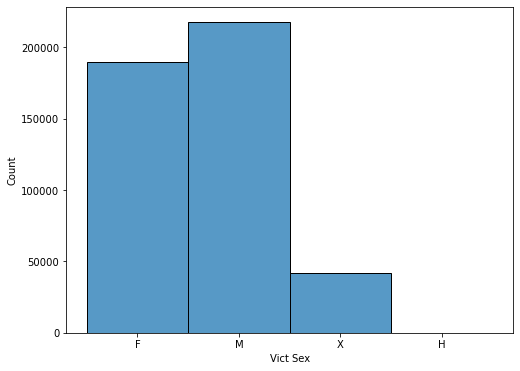

In [56]:
plt.figure(figsize=(8,6))

sns.histplot(data=df['Vict Sex'])

In the dataset description only F,M, and X is given. Not sure what H means. X means NA in the data.

<AxesSubplot:xlabel='hourOfCrime', ylabel='Count'>

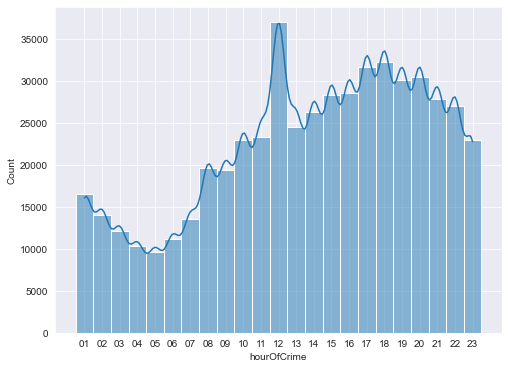

In [70]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))


hour = df.copy()
hour = hour.sort_values('hourOfCrime')

sns.histplot(x=hour['hourOfCrime'], bins=24, kde=True)

Looks like most of the crimes are reported to be around 12PM, and then it keeps a high number until midnight.

Note: The rest of the visualization is done through tableau.